In [ ]:
import zipfile
import os

# Caminho do arquivo ZIP e o diretório de destino para extração
caminho_zip = '/content/results.zip'
diretorio_destino = '/content/'

# Garante que o diretório de destino existe
os.makedirs(diretorio_destino, exist_ok=True)

# Extrai todos os arquivos do ZIP para o diretório de destino
with zipfile.ZipFile(caminho_zip, 'r') as zip_ref:
    zip_ref.extractall(diretorio_destino)

print("Arquivos extraídos com sucesso!")


Arquivos extraídos com sucesso!


In [ ]:
import shutil
import os

# Caminho do diretório que você quer limpar e excluir
diretorio = '/content/results'

# Verifica se o diretório existe antes de tentar excluir
if os.path.exists(diretorio):
    # Remove todos os arquivos e subdiretórios dentro do diretório
    shutil.rmtree(diretorio)
    print(f"{diretorio} foi limpo e excluído com sucesso!")
else:
    print("O diretório não existe.")


/content/results foi limpo e excluído com sucesso!


In [ ]:
import os

# Caminho da pasta que você quer listar os arquivos
caminho_pasta = '/content/results/rf'

# Lista todos os itens no diretório
arquivos = os.listdir(caminho_pasta)

# Filtra apenas os arquivos (ignorando subdiretórios)
# arquivos = [f for f in arquivos if os.path.isfile(os.path.join(caminho_pasta, f))]

print("Arquivos na pasta:")
for arquivo in arquivos:
    print(arquivo)


Arquivos na pasta:
German.json
Monk_2.json
Heart.json
Sonar.json
titanic.json
Votes_Congressional.json
Churn.json
Heart_2.json
Phishing.json
liver disorders_bupa.json
Hill.json
Biodeg.json
Banknote.json
Monk_3.json
KC2.json
Vertebral_2C.json
Horse colic.json
Musk.json
Monk_1.json
HELOC.json
Australian.json
Student.json
Tokyo.json
Ionosfera.json
Spambase.json
twonorm.json
EEg.json
Breast Cancer Wisconsin.json
Room Occupancy.json
Mobile Price Classification.json
mammographic_masses.json
Breast Cancer Coimbra.json
Diabetes.json


In [ ]:
import pandas as pd
import json
import os

# Definir o bucket e as pastas
path = 'results'
folders = ['rn', 'rf']

def list_files_in_folder(folder):
    # Lista todos os itens no diretório
    return os.listdir(caminho_pasta)

def load_json_from_s3(folder, key):
    with open(f"{path}/{folder}/{key}", 'r', encoding='utf-8') as arquivo:
        dados = json.load(arquivo)
    return dados
# Listar e carregar os JSONs
data = {}
for folder in folders:
    files = list_files_in_folder(folder)
    for file_key in files:
        base_name = file_key.replace('.json', '')  # Extrair o nome da base
        json_data = load_json_from_s3(folder, file_key)
        if base_name not in data:
            data[base_name] = {}
        if folder == 'rn':
            data[base_name]['Neural Network'] = json_data
        elif folder == 'rf':
            data[base_name]['Random Forest'] = json_data
        # data[base_name][folder] = json_data  # Adicionar o JSON à base

import pandas as pd

# Reformatar os dados para criar um DataFrame
data_reformatted = {}

# Iterar sobre as bases de dados e as pastas (rn, rf)
for base, folders_data in data.items():
    for folder, metrics in folders_data.items():
        for metric, value in metrics.items():
            # A chave do dicionário será uma tupla (base, folder)
            if metric not in data_reformatted:
                data_reformatted[metric] = {}
            data_reformatted[metric][(base, folder)] = value

# Criar o DataFrame com MultiIndex nas linhas (base de dados, pasta)
df = pd.DataFrame.from_dict(data_reformatted).unstack(level=1)

# Exibir o DataFrame
df.drop('Hill', inplace = True)
df



Quantidade de instâncias contrafactuais  \
                                                     Neural Network   
Australian                                                      110   
Banknote                                                        110   
Biodeg                                                          110   
Breast Cancer Coimbra                                           110   
Breast Cancer Wisconsin                                         110   
Churn                                                           110   
Diabetes                                                        110   
EEg                                                             110   
German                                                          110   
HELOC                                                           110   
Heart                                                           110   
Heart_2                                                         110   
Horse colic                                                     110   
Ionosfera                                                       110   
KC2                                                             110   
Mobile Price Classification                                     110   
Monk_1                                                          110   
Monk_2                                                          110   
Monk_3                                                          110   
Musk                                                            110   
Phishing                                                        110   
Room Occupancy                                                  110   
Sonar                                                           110   
Spambase                                                        110   
Student                                                         110   
Tokyo                                                           110   
Vertebral_2C                                                    110   
Votes_Congressional                                             110   
liver disorders_bupa                                            110   
mammographic_masses                                             110   
titanic                                                         110   
twonorm                                                         110   

                                           \
                            Random Forest   
Australian                            110   
Banknote                              110   
Biodeg                                110   
Breast Cancer Coimbra                 110   
Breast Cancer Wisconsin               110   
Churn                                 110   
Diabetes                              110   
EEg                                   110   
German                                110   
HELOC                                 110   
Heart                                 110   
Heart_2                               110   
Horse colic                           110   
Ionosfera                             110   
KC2                                   110   
Mobile Price Classification           110   
Monk_1                                110   
Monk_2                                110   
Monk_3                                110   
Musk                                  110   
Phishing                              110   
Room Occupancy                        110   
Sonar                                 110   
Spambase                              110   
Student                               110   
Tokyo                                 110   
Vertebral_2C                          110   
Votes_Congressional                   110   
liver disorders_bupa                  110   
mammographic_masses                   110   
titanic                               110   
twonorm                               110   

                            Quantidade de relações causais na base de dados  \
   

In [ ]:
size_order = ['Banknote',
 'mammographic_masses',
 'Room Occupancy',
 'liver disorders_bupa',
 'Monk_1',
 'Monk_2',
 'Monk_3',
 'Vertebral_2C',
 'Diabetes',
 'Breast Cancer Coimbra',
 'Heart',
 'Heart_2',
 'EEg',
 'Australian',
 'Votes_Congressional',
 'German',
 'Mobile Price Classification',
 'twonorm',
 'KC2',
 'HELOC',
 'titanic',
 'Phishing',
 'Breast Cancer Wisconsin',
 'Ionosfera',
 'Horse colic',
 'Churn',
 'Biodeg',
 'Student',
 'Tokyo',
 'Spambase',
 'Sonar',
 'Musk']

size_list = [('Banknote', 5),
 ('mammographic_masses', 6),
 ('Room Occupancy', 6),
 ('liver disorders_bupa', 7),
 ('Monk_1', 7),
 ('Monk_2', 7),
 ('Monk_3', 7),
 ('Vertebral_2C', 7),
 ('Diabetes', 9),
 ('Breast Cancer Coimbra', 10),
 ('Heart', 14),
 ('Heart_2', 14),
 ('EEg', 15),
 ('Australian', 16),
 ('Votes_Congressional', 17),
 ('German', 21),
 ('Mobile Price Classification', 21),
 ('twonorm', 21),
 ('KC2', 22),
 ('HELOC', 24),
 ('titanic', 27),
 ('Phishing', 31),
 ('Breast Cancer Wisconsin', 32),
 ('Ionosfera', 35),
 ('Horse colic', 37),
 ('Churn', 41),
 ('Biodeg', 42),
 ('Student', 44),
 ('Tokyo', 45),
 ('Spambase', 58),
 ('Sonar', 61),
 ('Musk', 165)]

In [ ]:
df = df.reindex(size_order)
df

Quantidade de instâncias contrafactuais  \
                                                     Neural Network   
Banknote                                                        110   
mammographic_masses                                             110   
Room Occupancy                                                  110   
liver disorders_bupa                                            110   
Monk_1                                                          110   
Monk_2                                                          110   
Monk_3                                                          110   
Vertebral_2C                                                    110   
Diabetes                                                        110   
Breast Cancer Coimbra                                           110   
Heart                                                           110   
Heart_2                                                         110   
EEg                                                             110   
Australian                                                      110   
Votes_Congressional                                             110   
German                                                          110   
Mobile Price Classification                                     110   
twonorm                                                         110   
KC2                                                             110   
HELOC                                                           110   
titanic                                                         110   
Phishing                                                        110   
Breast Cancer Wisconsin                                         110   
Ionosfera                                                       110   
Horse colic                                                     110   
Churn                                                           110   
Biodeg                                                          110   
Student                                                         110   
Tokyo                                                           110   
Spambase                                                        110   
Sonar                                                           110   
Musk                                                            110   

                                           \
                            Random Forest   
Banknote                              110   
mammographic_masses                   110   
Room Occupancy                        110   
liver disorders_bupa                  110   
Monk_1                                110   
Monk_2                                110   
Monk_3                                110   
Vertebral_2C                          110   
Diabetes                              110   
Breast Cancer Coimbra                 110   
Heart                                 110   
Heart_2                               110   
EEg                                   110   
Australian                            110   
Votes_Congressional                   110   
German                                110   
Mobile Price Classification           110   
twonorm                               110   
KC2                                   110   
HELOC                                 110   
titanic                               110   
Phishing                              110   
Breast Cancer Wisconsin               110   
Ionosfera                             110   
Horse colic                           110   
Churn                                 110   
Biodeg                                110   
Student                               110   
Tokyo                                 110   
Spambase                              110   
Sonar                                 110   
Musk                                  110   

                            Quantidade de relações causais na base de dados  \
   

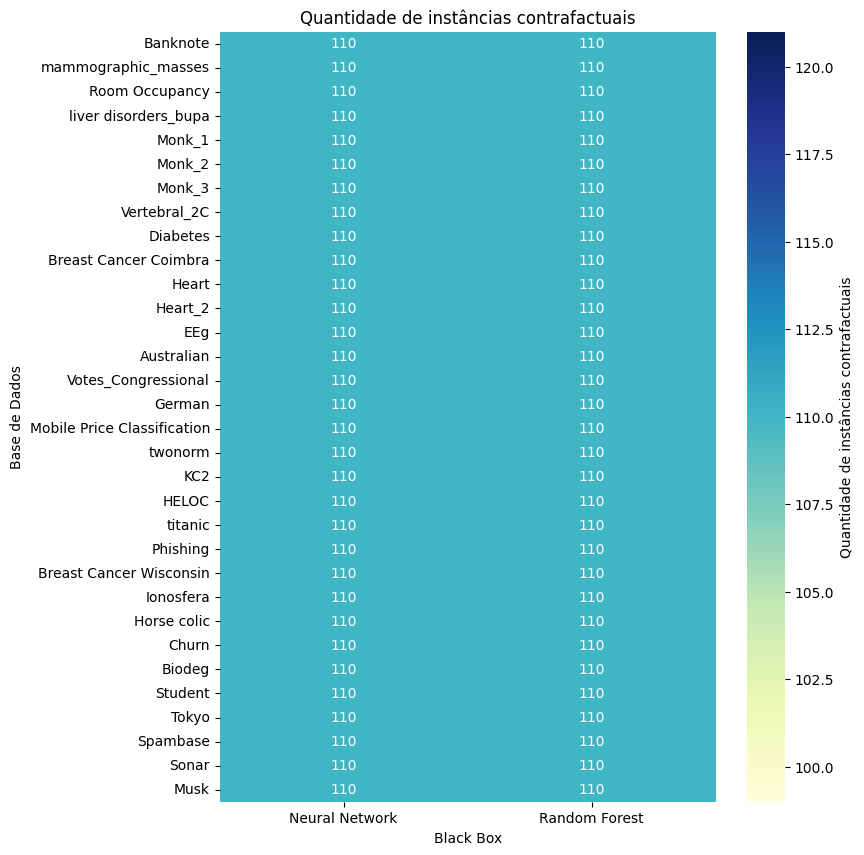

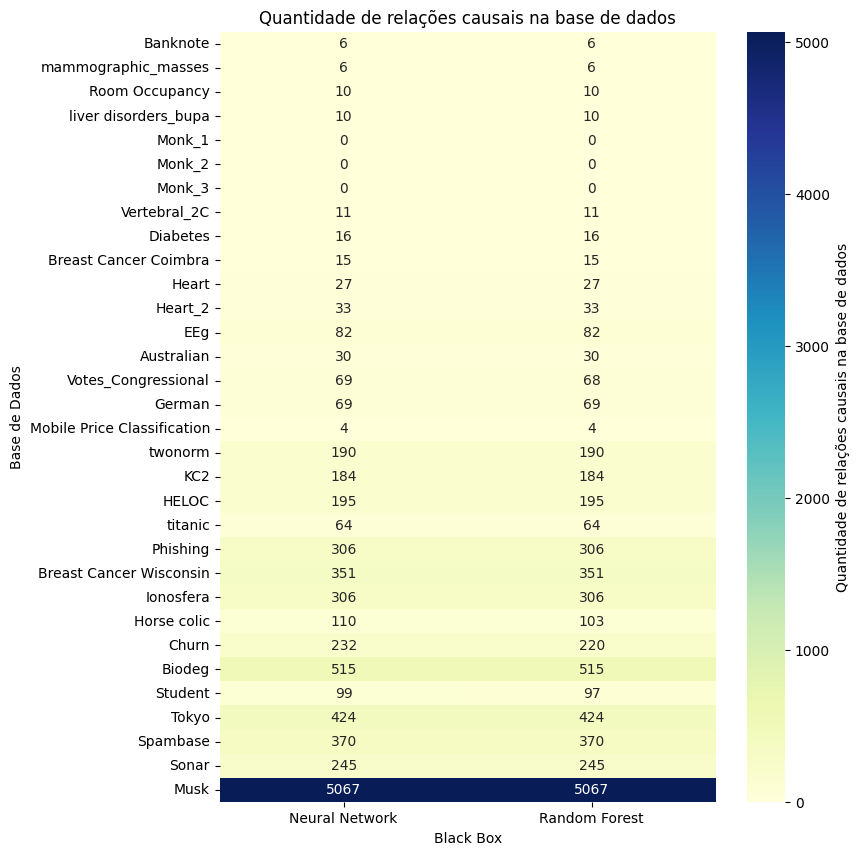

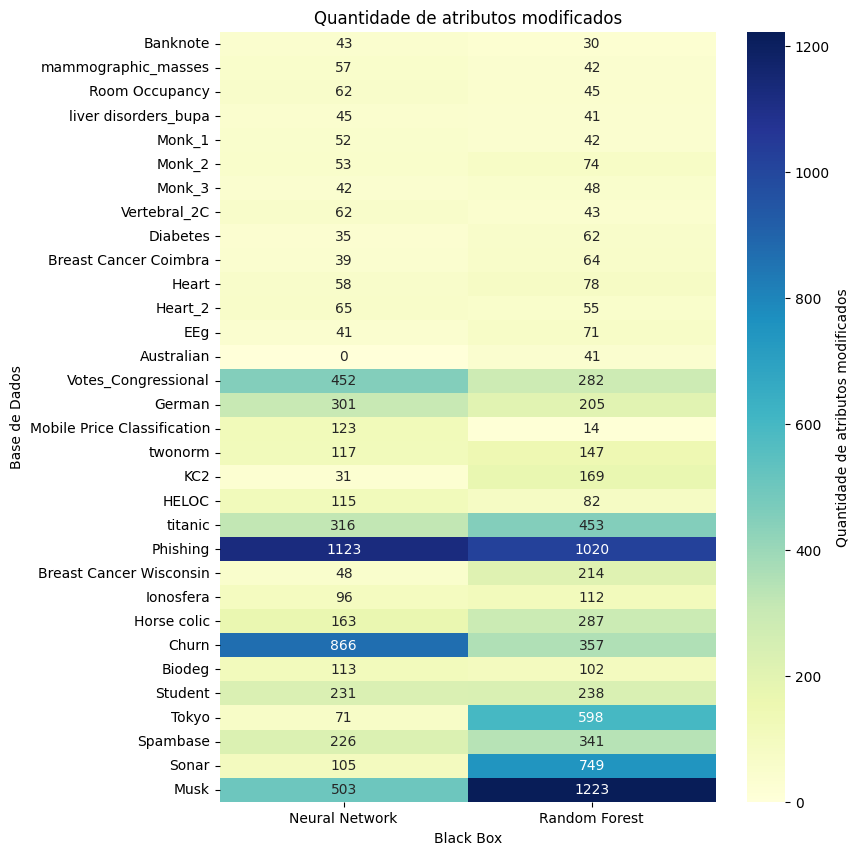

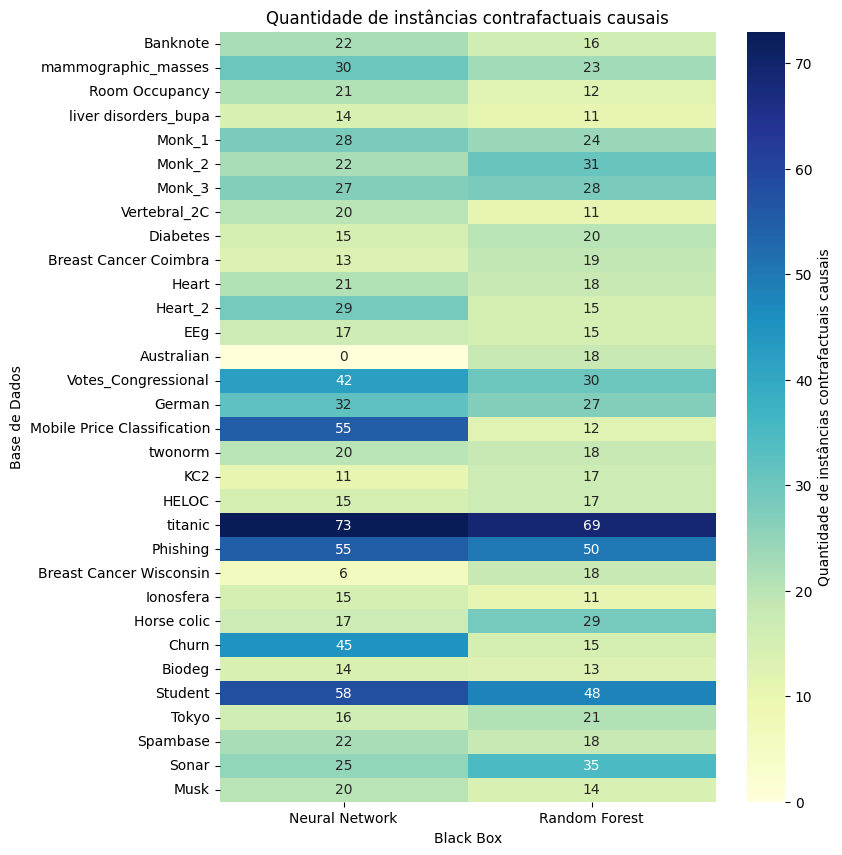

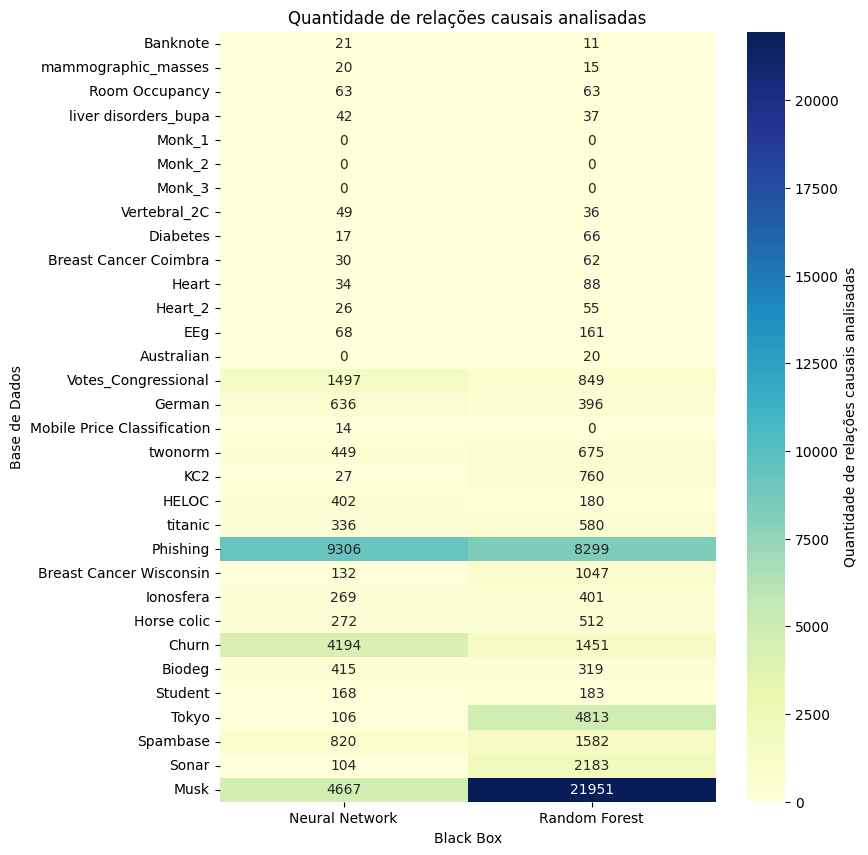

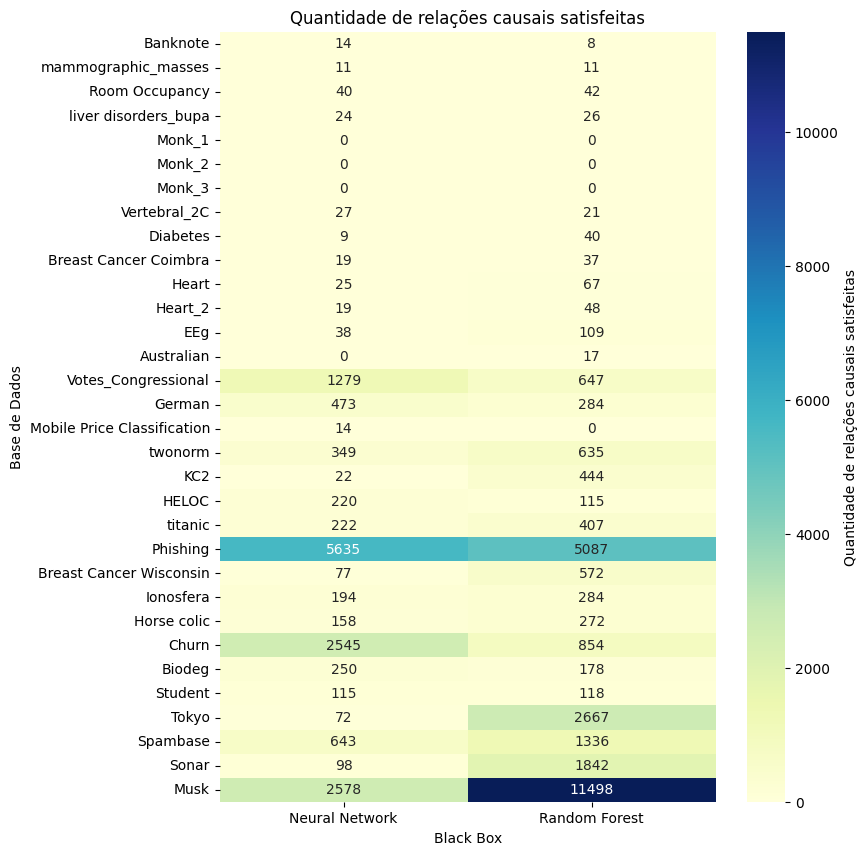

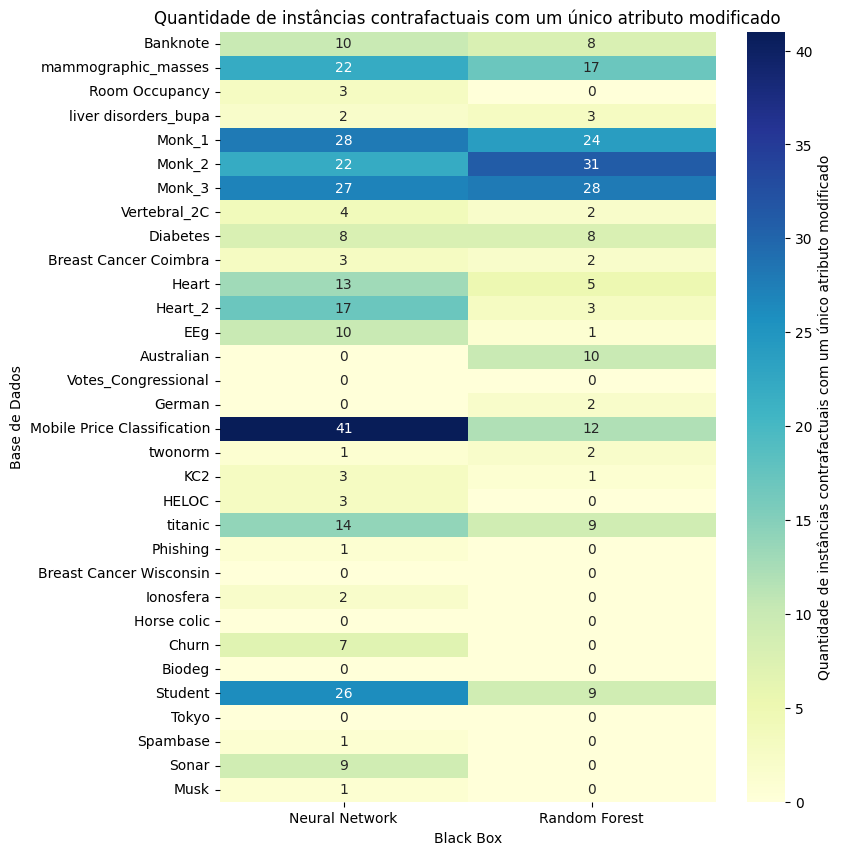

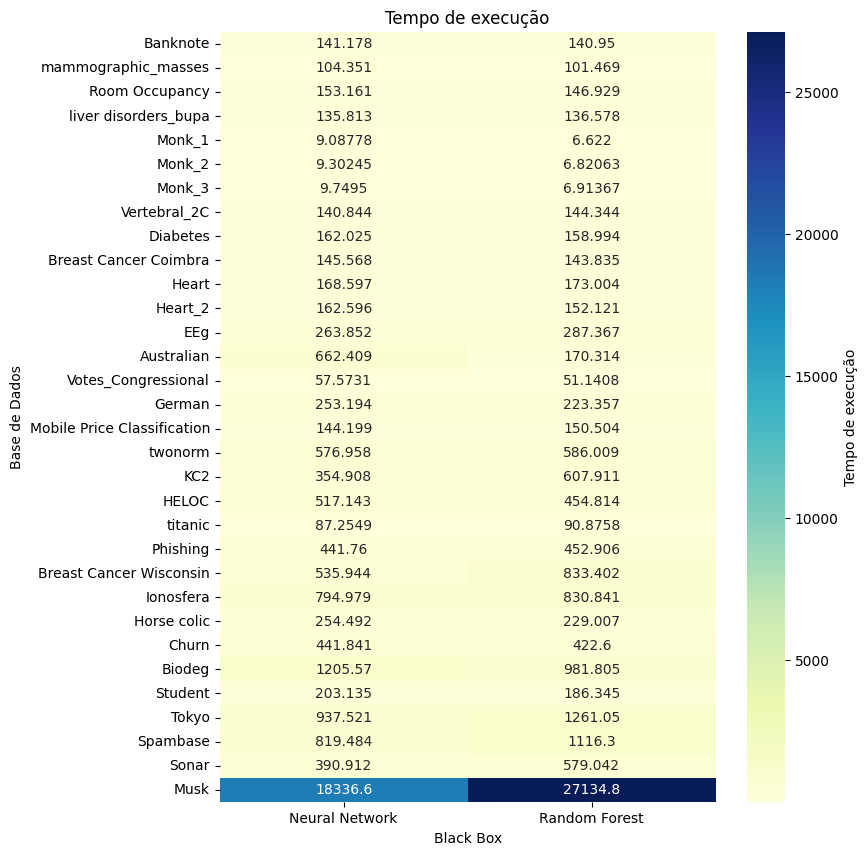

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar heatmaps para cada métrica
for metric in df.columns.levels[0]:  # Iterar sobre as métricas
    plt.figure(figsize=(8, 10))
    sns.heatmap(df[metric], annot=True, cmap="YlGnBu", cbar_kws={'label': metric}, fmt="g")

    plt.title(f"{metric}")
    plt.xlabel("Black Box")
    plt.ylabel("Base de Dados")
    plt.show()


In [ ]:
df.drop('Musk', inplace = True)

In [ ]:
dataset_mapping = {
    'Banknote': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'mammographic_masses': {'Tamanho': 'Pequena', 'Tipo': 'Categórica'},
    'Room Occupancy': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'liver disorders_bupa': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'Monk_1': {'Tamanho': 'Pequena', 'Tipo': 'Categórica'},
    'Monk_2': {'Tamanho': 'Pequena', 'Tipo': 'Categórica'},
    'Monk_3': {'Tamanho': 'Pequena', 'Tipo': 'Categórica'},
    'Vertebral_2C': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'Diabetes': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'Breast Cancer Coimbra': {'Tamanho': 'Pequena', 'Tipo': 'Numérica'},
    'Heart': {'Tamanho': 'Média', 'Tipo': 'Mista'},
    'Heart_2': {'Tamanho': 'Média', 'Tipo': 'Mista'},
    'EEg': {'Tamanho': 'Média', 'Tipo': 'Numérica'},
    'Australian': {'Tamanho': 'Média', 'Tipo': 'Mista'},
    'Votes_Congressional': {'Tamanho': 'Média', 'Tipo': 'Categórica'},
    'German': {'Tamanho': 'Média', 'Tipo': 'Mista'},
    'Mobile Price Classification': {'Tamanho': 'Média', 'Tipo': 'Numérica'},
    'twonorm': {'Tamanho': 'Média', 'Tipo': 'Numérica'},
    'KC2': {'Tamanho': 'Média', 'Tipo': 'Numérica'},
    'HELOC': {'Tamanho': 'Média', 'Tipo': 'Numérica'},
    'titanic': {'Tamanho': 'Média', 'Tipo': 'Mista'},
    'Phishing': {'Tamanho': 'Grande', 'Tipo': 'Categórica'},
    'Breast Cancer Wisconsin': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Ionosfera': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Horse colic': {'Tamanho': 'Grande', 'Tipo': 'Categórica'},
    'Churn': {'Tamanho': 'Grande', 'Tipo': 'Categórica'},
    'Biodeg': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Student': {'Tamanho': 'Grande', 'Tipo': 'Mista'},
    'Tokyo': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Spambase': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Sonar': {'Tamanho': 'Grande', 'Tipo': 'Numérica'},
    'Musk': {'Tamanho': 'Grande', 'Tipo': 'Numérica'}
}

pequeno = [idx for idx, item in dataset_mapping.items() if item['Tamanho'] == "Pequena"]
medio = [idx for idx, item in dataset_mapping.items() if item['Tamanho'] == "Média"]
grande = [idx for idx, item in dataset_mapping.items() if item['Tamanho'] == "Grande"]

numerica = [idx for idx, item in dataset_mapping.items() if item['Tipo'] == "Numérica"]
categorica = [idx for idx, item in dataset_mapping.items() if item['Tipo'] == "Categórica"]
mista = [idx for idx, item in dataset_mapping.items() if item['Tipo'] == "Mista"]


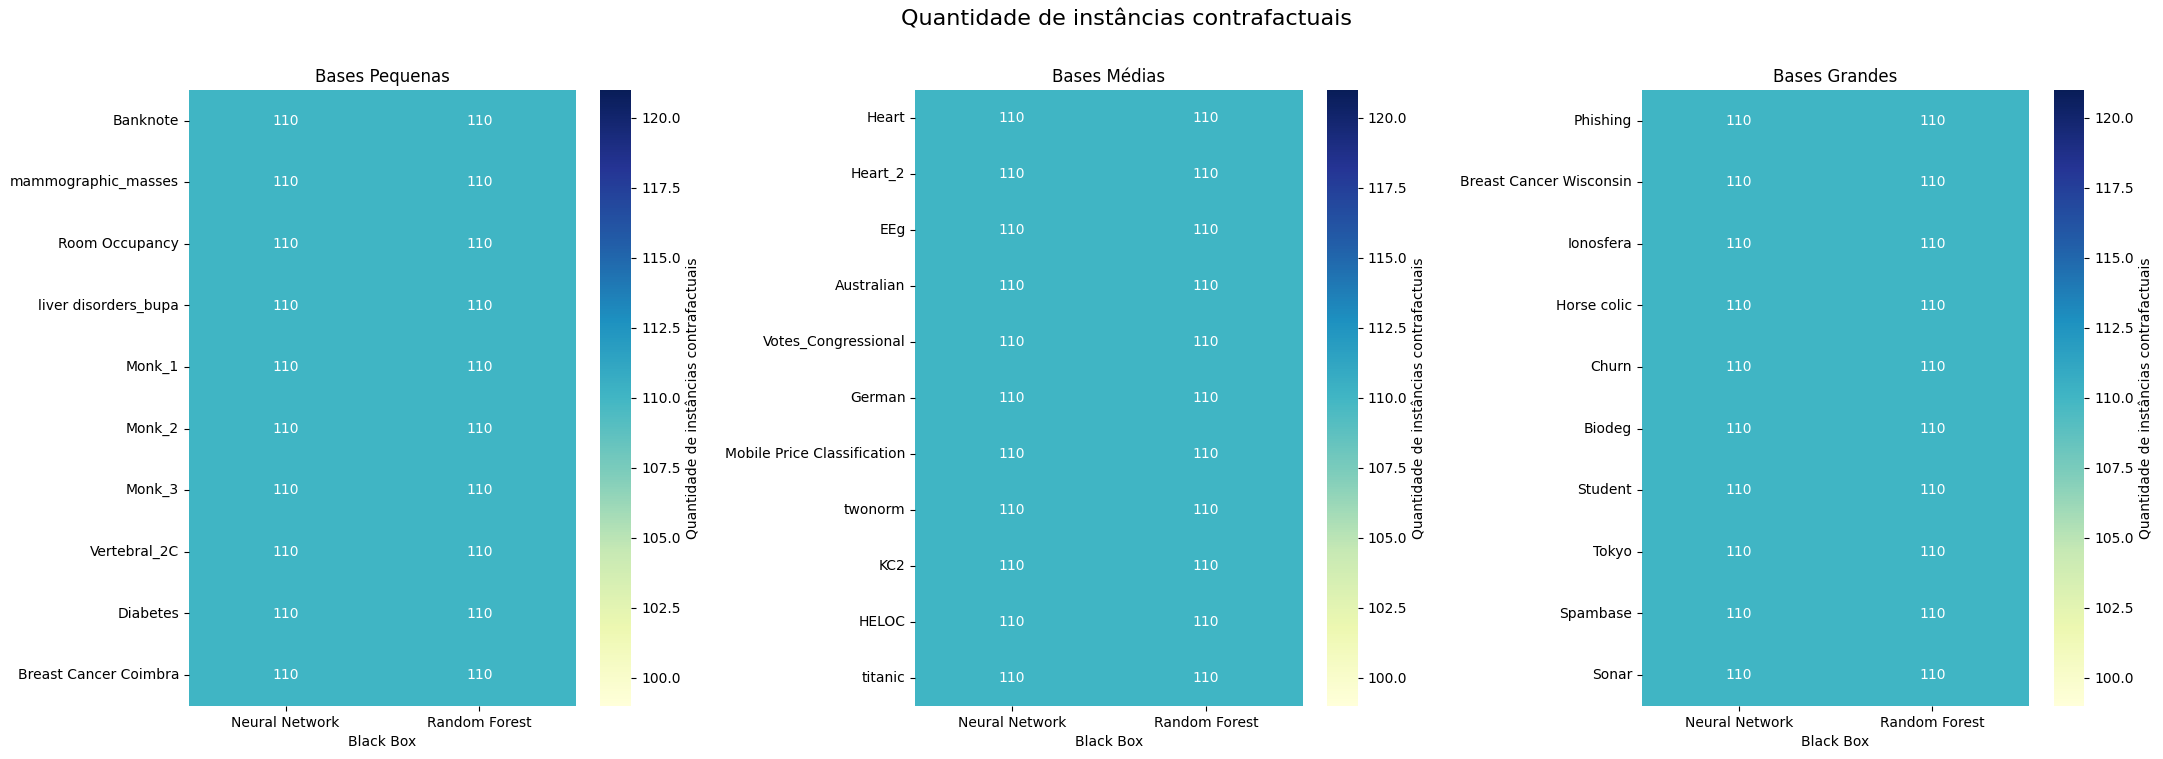

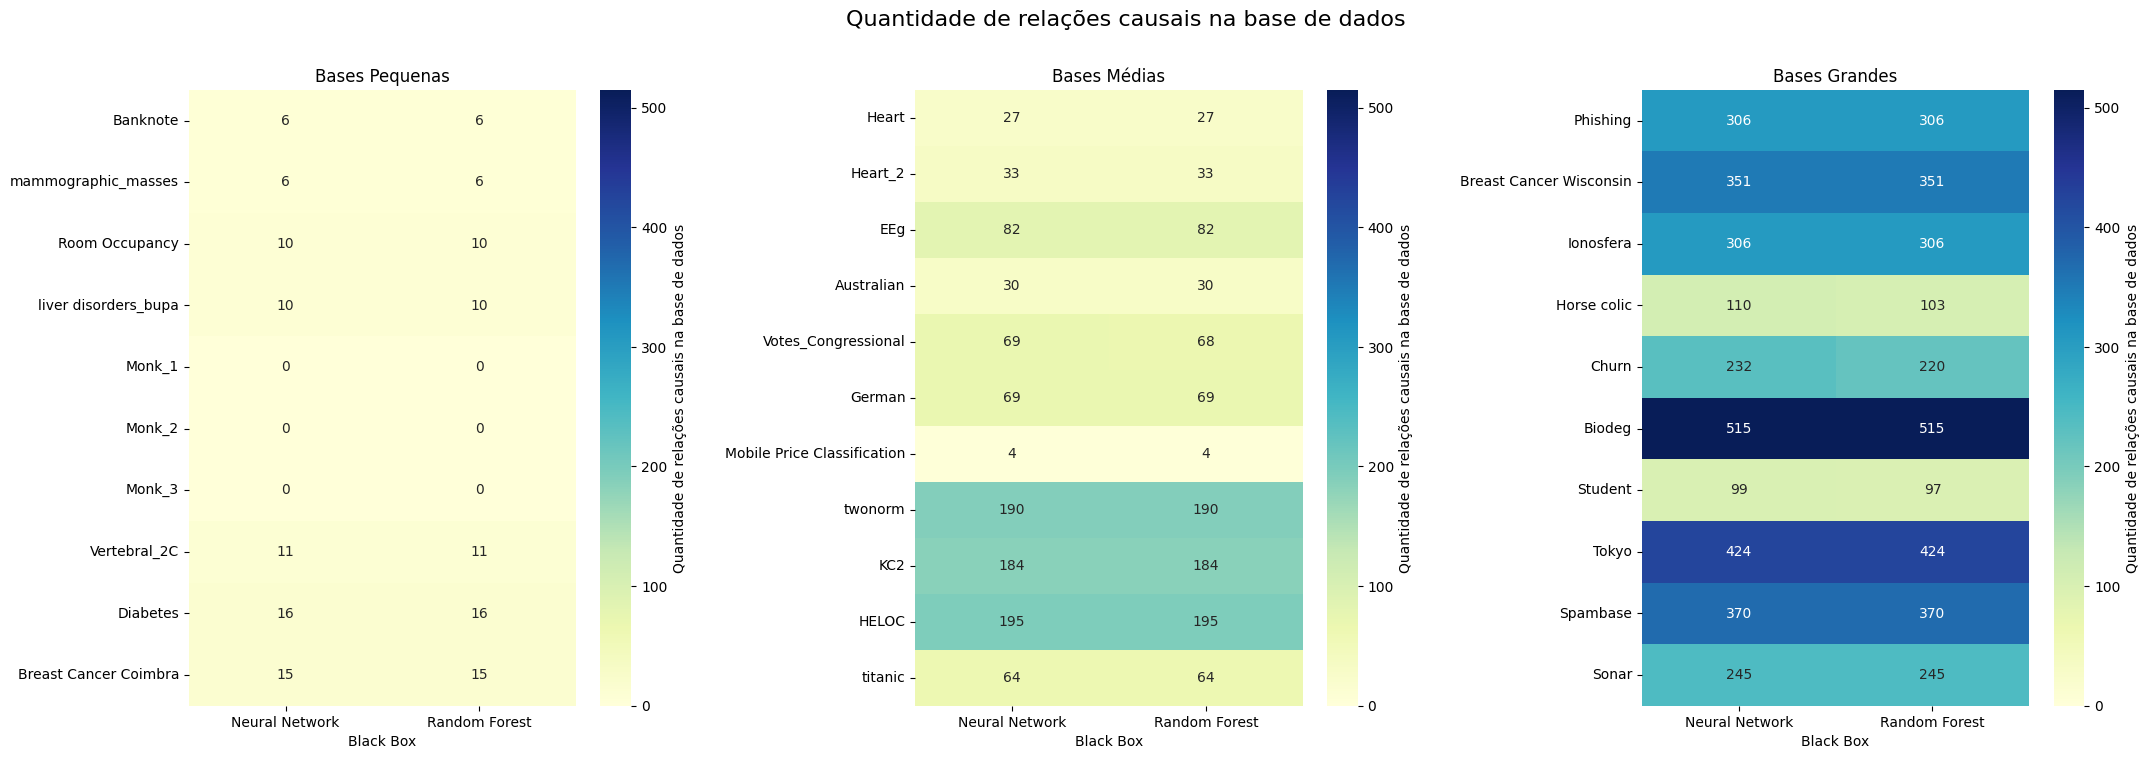

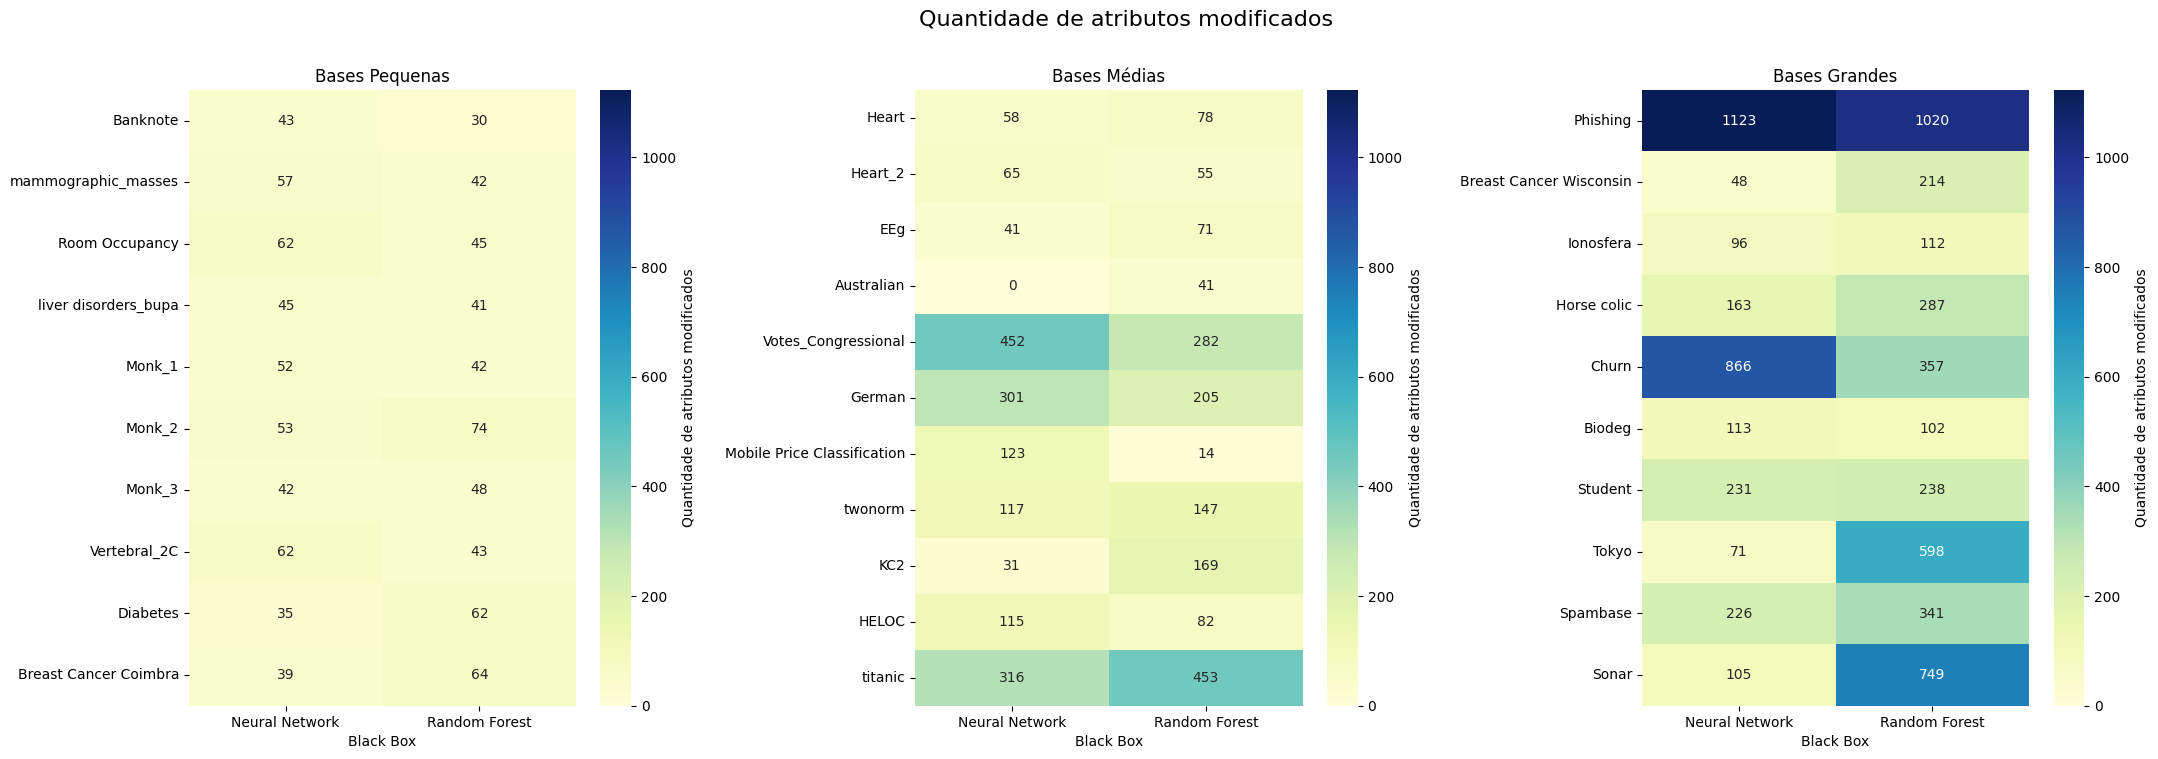

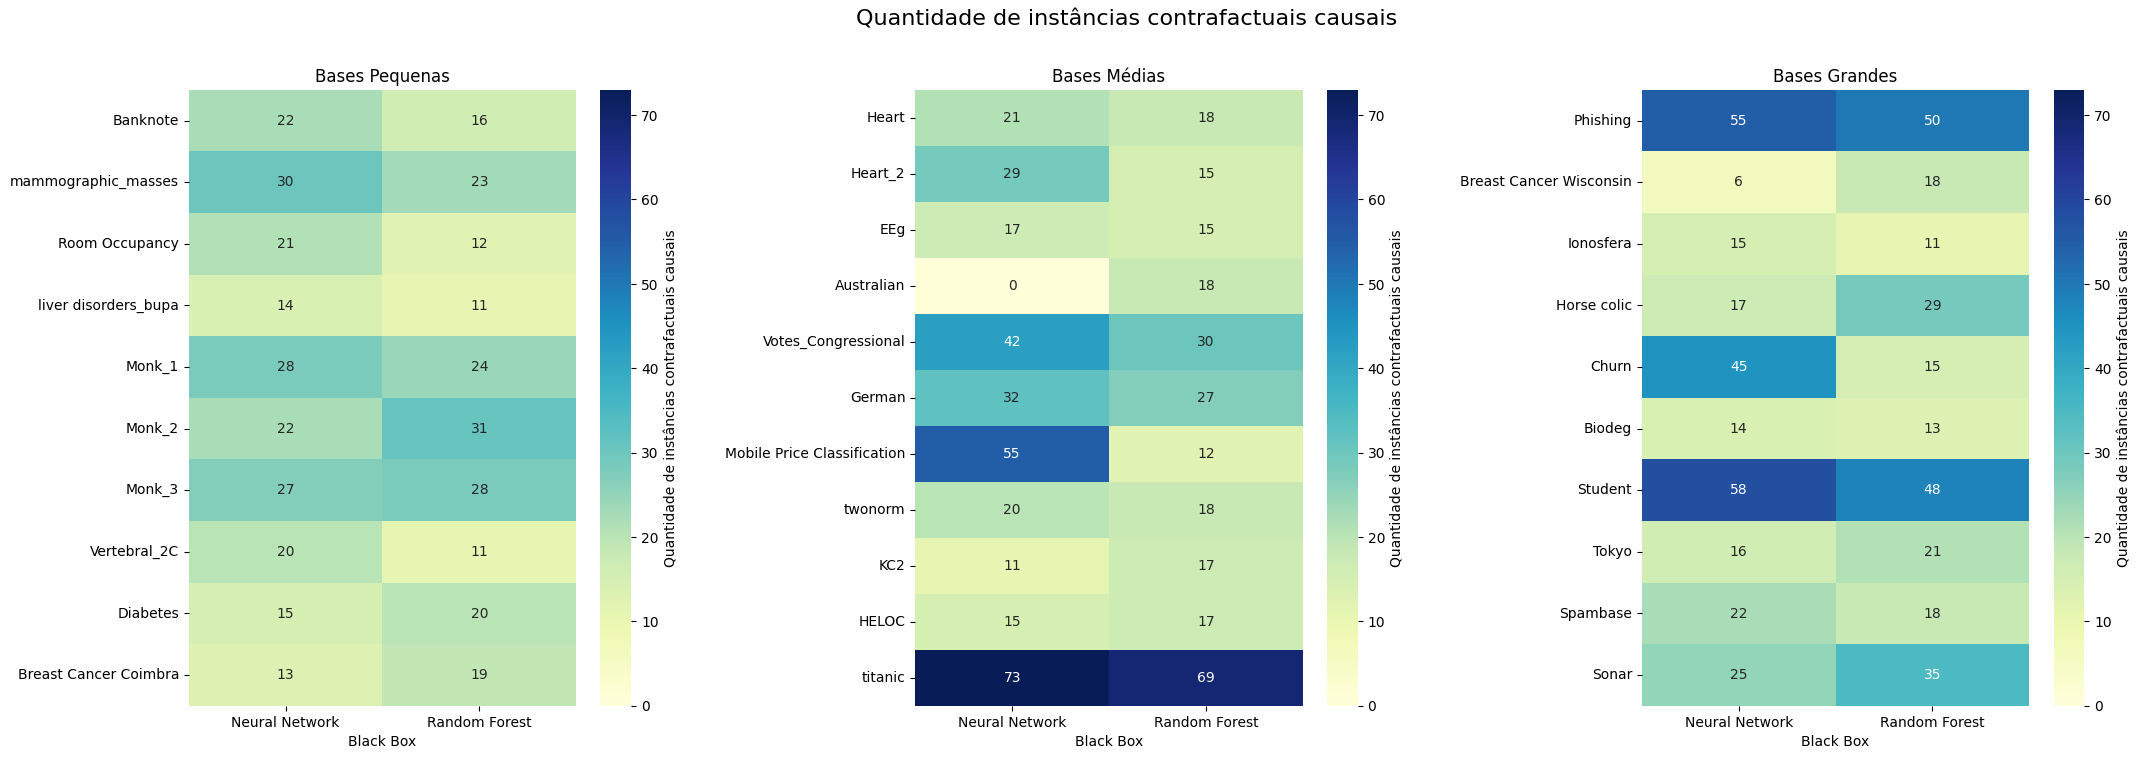

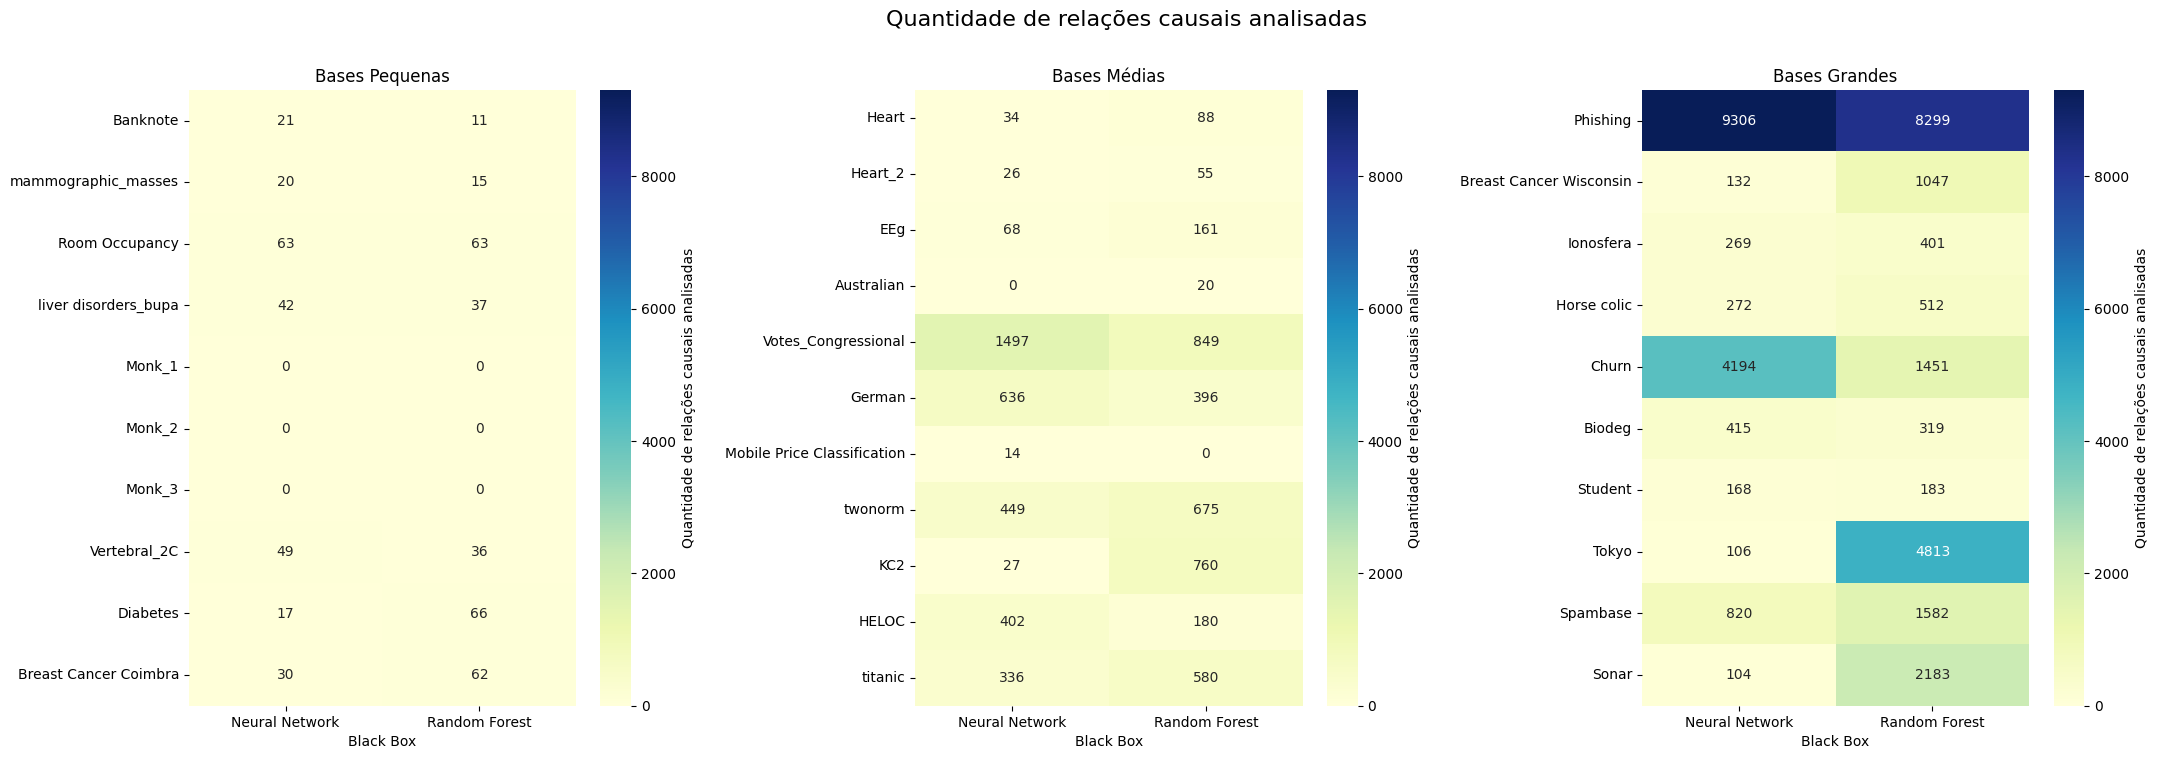

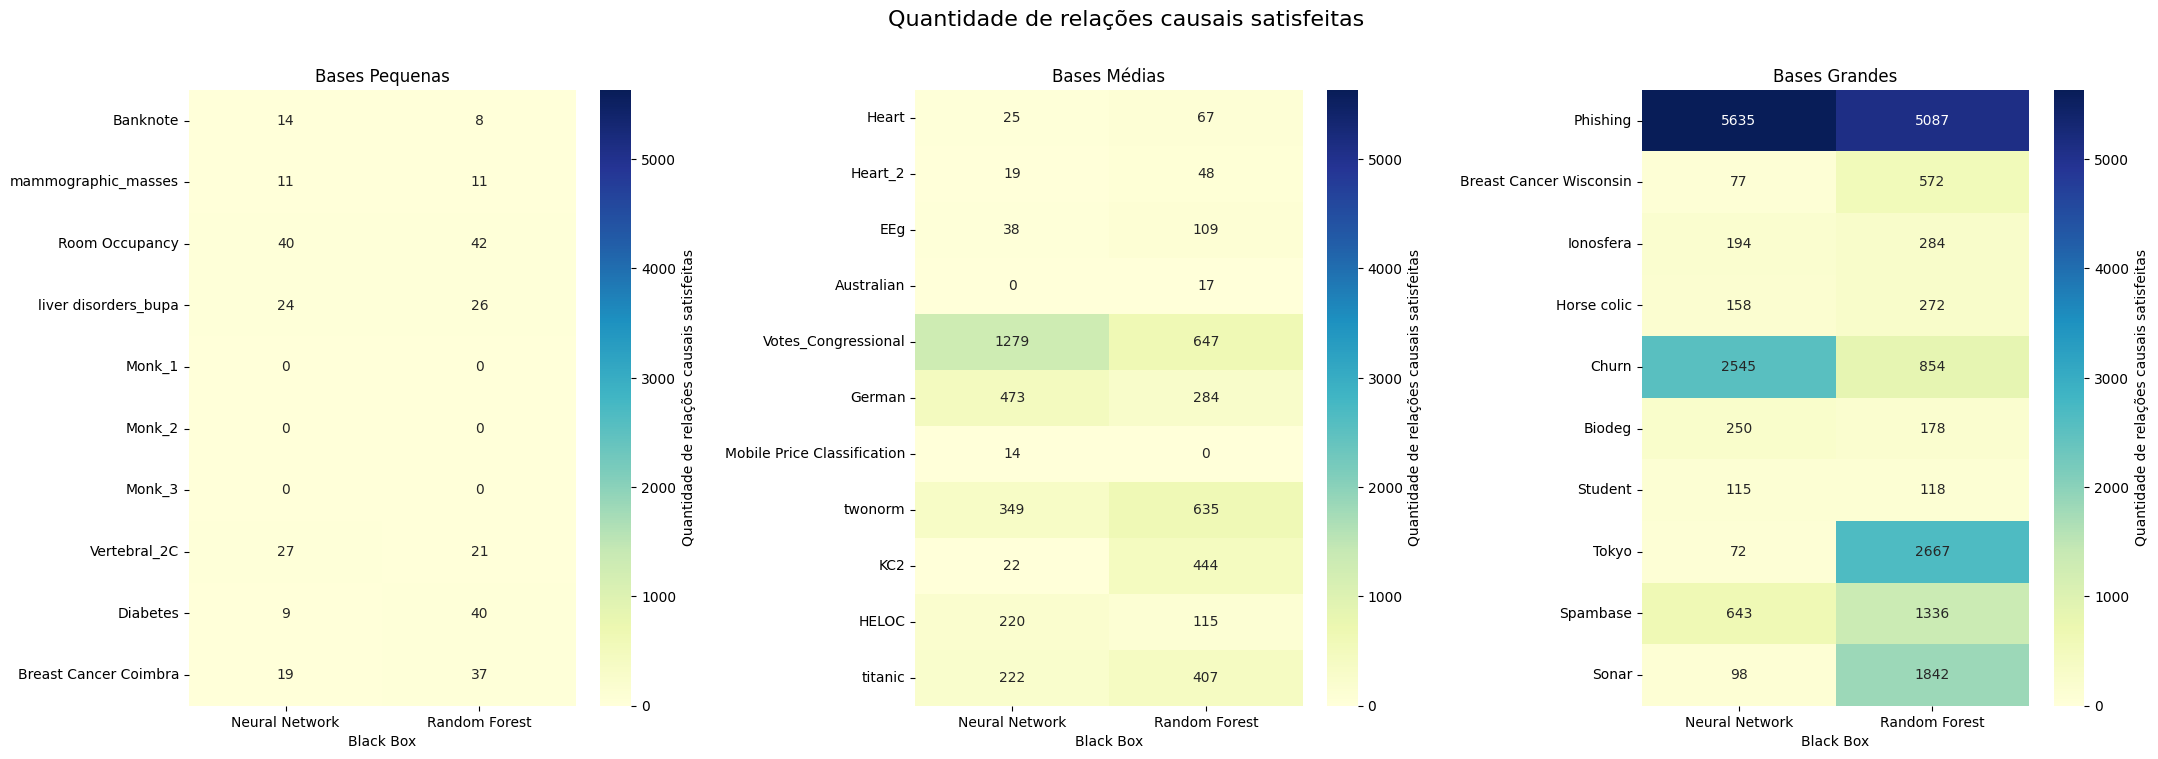

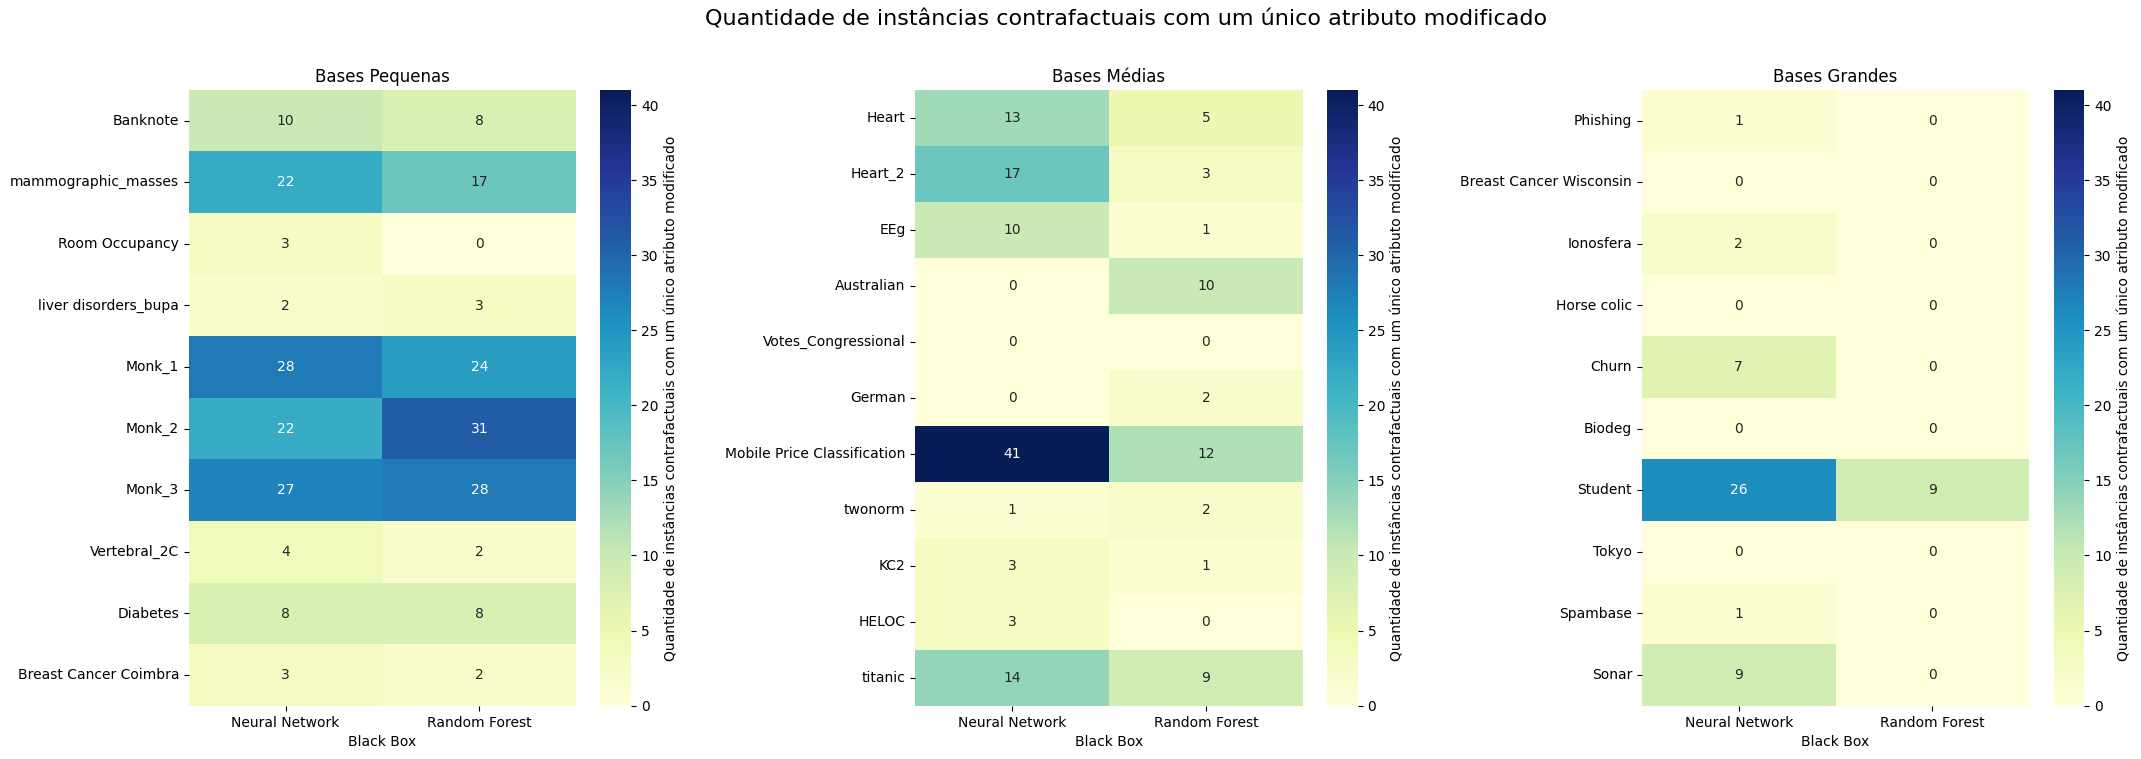

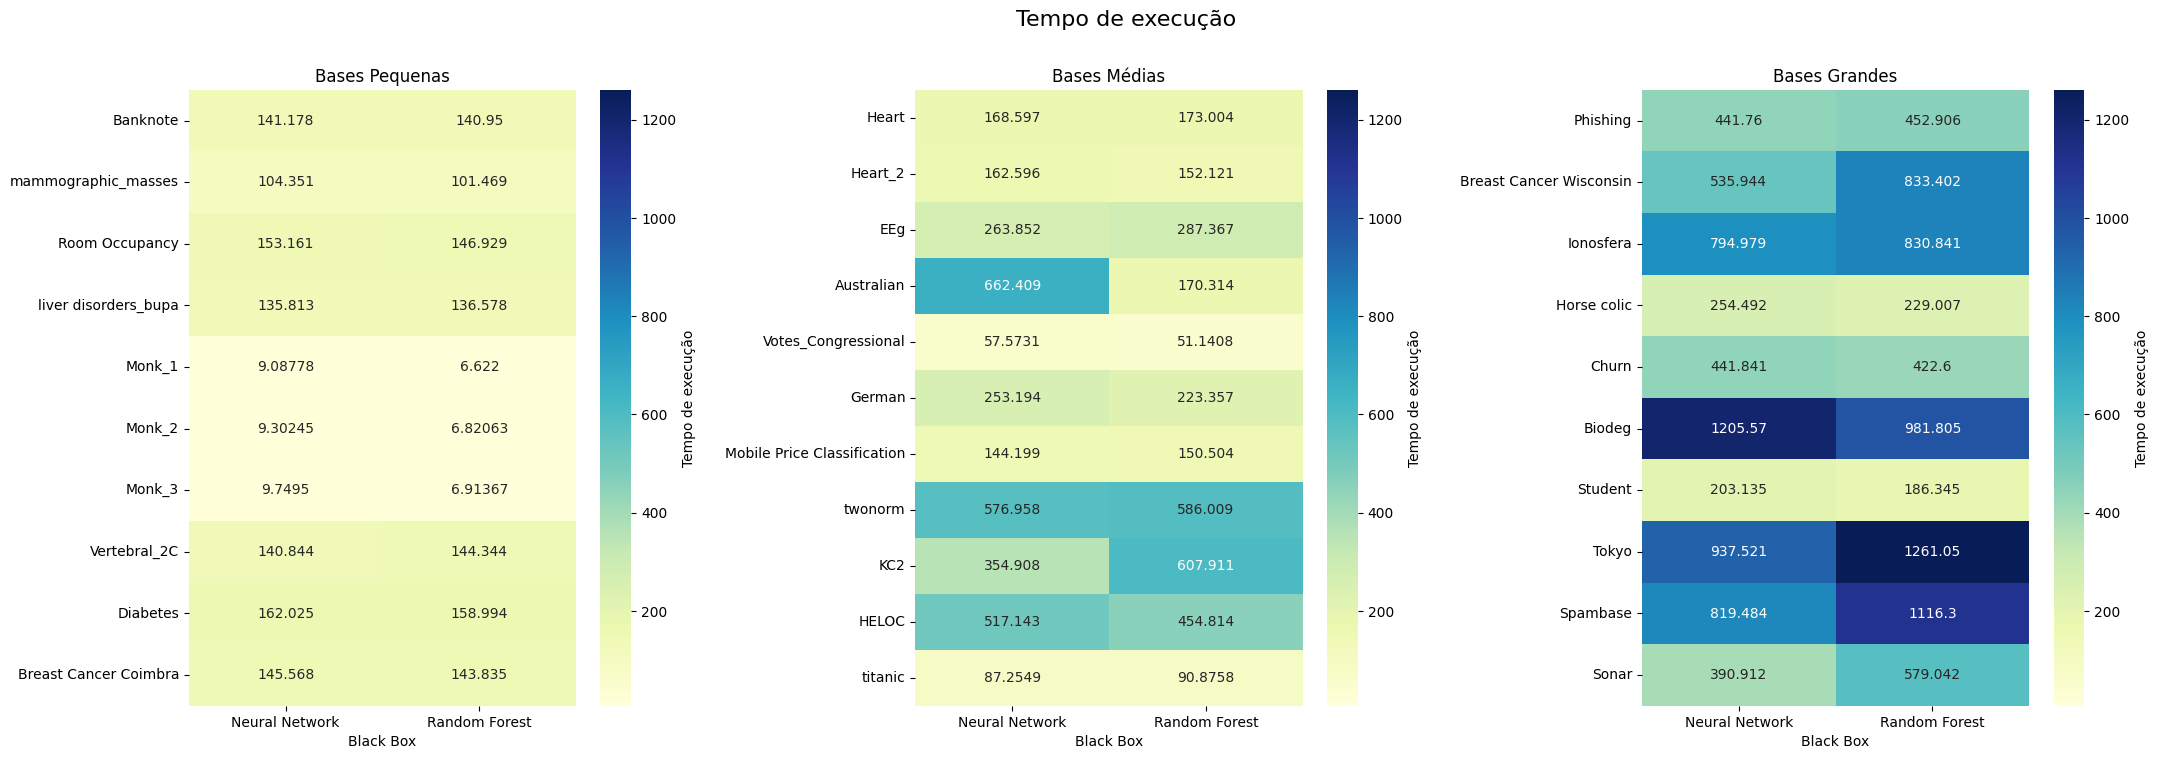

In [ ]:
for metric in df.columns.levels[0]:  # Iterar sobre as métricas

    vmin = df[metric].min().min()
    vmax = df[metric].max().max()

    fig, axes = plt.subplots(1, 3, figsize=(25, 8))

    sns.heatmap(df[df.index.isin(pequeno)][metric], annot=True, cmap="YlGnBu", cbar_kws={'label': metric}, fmt="g", ax = axes[0], vmin=vmin, vmax=vmax)
    axes[0].set_title(f'Bases Pequenas')
    axes[0].set_xlabel('Black Box')

    sns.heatmap(df[df.index.isin(medio)][metric], annot=True, cmap="YlGnBu", cbar_kws={'label': metric}, fmt="g", ax = axes[1], vmin=vmin, vmax=vmax)
    axes[1].set_title(f'Bases Médias')
    axes[1].set_xlabel('Black Box')

    sns.heatmap(df[df.index.isin(grande)][metric], annot=True, cmap="YlGnBu", cbar_kws={'label': metric}, fmt="g", ax = axes[2], vmin=vmin, vmax=vmax)
    axes[2].set_title(f'Bases Grandes')
    axes[2].set_xlabel('Black Box')

    fig.suptitle(f'{metric}', fontsize=16)
    plt.subplots_adjust(wspace=0.5)  # Aumenta o espaçamento horizontal entre os gráficos



    plt.show()